In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
A1 = np.load('A1.npy')
B1 = np.load('B1.npy')
A2 = np.load('A2.npy')
B2 = np.load('B2.npy')
test_image = np.load('test_image_label_27.npy')
print(A1.shape, A1.dtype)
print(B1.shape, B1.dtype)
print(A2.shape, A2.dtype)
print(B2.shape, B2.dtype)
print(test_image.shape, test_image.dtype)

(128, 784) int8
(128,) int32
(10, 128) int8
(10,) int32
(28, 28) float32


In [5]:
print(0.007086 * A1.flatten()[0:5])
print(0.000028 *B1[0:5])

[ 0.049602 -0.03543  -0.028344 -0.056688  0.056688]
[-0.066192  0.139524 -0.064176  0.011732  0.10094 ]


For index 27, the expected label is 4. Here's the expected tensor output, obtained by running the TFLite Interpretor on the same test image:

**[ 75  97 100 108 217 110  85 128  97 159]**

float32:

**[-13.089978 -8.978213 -8.512205 -6.994018 13.381388 -6.6630683 -11.334353 -3.0743856 -8.96207 2.6339076]**

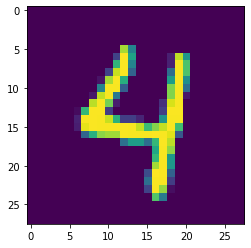

In [6]:
plt.imshow(test_image)
plt.show()

In [7]:
#print(test_image)
#print(test_image_uint8)

In [8]:
def ReLU(x):
    return x * (x > 0)

These are the DNN equations:

**Layer 1**

$X_1 = ReLU(A_1 \cdot X + B_1$)

**Layer 2**

$X_2 = A_2 \cdot X_1 + B_2$

Quantization equations:

$r = S(q - Z)$

Applying this above,

$r_2 = $



In [29]:
# scales
S1 = 0.007085771299898624 
S2 = 0.003921568859368563
S3 = 0.000027787340513896197 
print(S1*S2)
S4 = 0.04413054510951042 

S5 = 0.007275809068232775 
S6 = 0.04413054510951042 
print(S5*S6)
S7 = 0.00032108541927300394 
S8 = 0.1862911880016327 

2.7787340074289946e-05
0.00032108542029383146


In [42]:
X = test_image.flatten()

# Layer 1 
Xq = np.array(X/S2, dtype=np.uint8)
X1 = np.array(np.matmul(A1.astype(np.int32), Xq) + B1, dtype=np.int32)
#print(X1)
#print(S1*S2*X1)

X1 = ReLU((S1*S2/S4)*X1)
X1 = X1.astype(np.int8)
#print(X1)
X2 = np.array(np.matmul(A2.astype(np.int32), X1) + B2, dtype=np.int32)
X2 = (S5*S6/S8)*X2
X2 = X2.astype(np.int8)
print(X2, X2.shape)
print(S8*(X2-17-128))

[-69 -47 -44 -36  71 -35 -59 -16 -47  13] (10,)
[-39.86631423 -35.7679081  -35.20903453 -33.71870503 -13.78554791
 -33.53241384 -38.00340235 -29.99288127 -35.7679081  -24.59043682]


In [27]:
x = np.array([ 75, 97, 100, 108, 217, 110, 85, 128, 97, 159])
0.1862911880016327 * (x - 17) 

array([10.8048889 , 14.90329504, 15.4621686 , 16.95249811, 37.2582376 ,
       17.32508048, 12.66780078, 20.67832187, 14.90329504, 26.4533487 ])